# Task

## Requirements
1. Do text preprocessing (e.g., stopword removal, lemmatization, stemming, etc.)
2. TF-IDF text representation
3. Run LDA
4. Identify the optimal number of topics
5. Show top 10 words for each topic.


## Data
The dataset consists 2885 datasets information in 15 columns:

- Title
- Subtitle
- Owner
- Vote
- Last update
- Tags
- Datatype
- Size
- License
- Views
- Downloads
- Kernels
- Topics
- URL
- Description


# Approach

One can see that the variables title, subtitle as well as description can be used for topic modeling. Therefore we start with 'Title', go on with 'Description' and finish with 'Subtitle' (if necessary) to get the best possible topics out of the dataset.

# Step-by-Step

## Preparation
### Load Packages & Data

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# load data
pd.options.display.max_rows = 10
d = pd.read_csv("dataset.csv") 
d
d2 = d # backup for testing

In [3]:
# show dataframe information
# d.shape
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 15 columns):
Title          2885 non-null object
Subtitle       2413 non-null object
Owner          2885 non-null object
Votes          2885 non-null int64
Last Update    2885 non-null object
Tags           1700 non-null object
Data Type      2885 non-null object
Size           2885 non-null object
License        2885 non-null object
Views          2874 non-null object
Download       2803 non-null object
Kernels        1276 non-null object
Topics         2243 non-null object
URL            2885 non-null object
Description    2874 non-null object
dtypes: int64(1), object(14)
memory usage: 338.2+ KB


# "Title" Analysis

## Text Preprocessing

In [4]:
# preprocess 'Title'
# Load the regular expression library
import re

# Remove unnessesary characters - simple form of lemmatization
d['title_preprocessed'] = d['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
d['title_preprocessed'] = d['title_preprocessed'].map(lambda x: x.lower())

# Print out the first rows
d['title_preprocessed'].head() # success

0    credit card fraud detection
1       european soccer database
2        tmdb 5000 movie dataset
3      human resources analytics
4      global terrorism database
Name: title_preprocessed, dtype: object

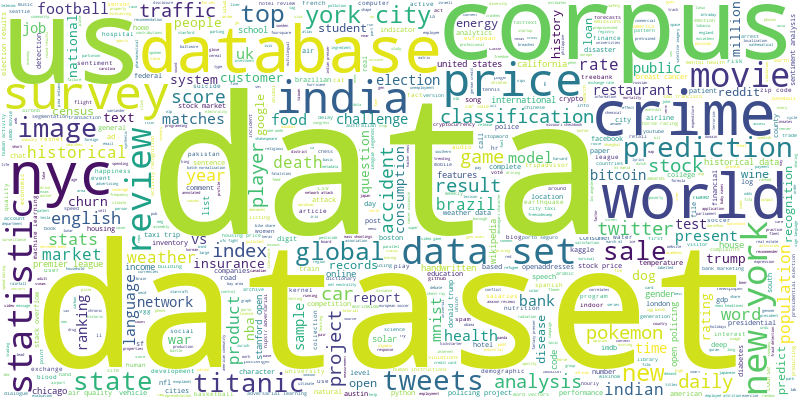

In [5]:
# check interim result 

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(d['title_preprocessed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue',
                      height=400, width = 800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [6]:
# remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
# title_no_stop_words.values.apply(lambda x: [item for item in x if item not in stop]) # first unsuccessful approach
# d['title_preprocessed'] = pd.Series([word for word in d['title_preprocessed'] if word not in stop]) # second unsuccesful approach
d['title_preprocessed'] = d['title_preprocessed'].str.lower().str.split() # old preprocessing step for following solution 
d['title_preprocessed'] = d['title_preprocessed'].apply(lambda x: [item for item in x if item not in stop])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# check result
print(list(d['Title'][15:16]))
print(list(d['title_preprocessed'][15:16])) 
# success

['Where it Pays to Attend College']
[['pays', 'attend', 'college']]


In [8]:
# perform stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
temp_list = []
for words in list(d['title_preprocessed']):
    temp_list.append(stemming.stem(" ".join(words)))
    
    # print(words)
    for word in words:
        stemming.stem(word)
        # print(word)
        
d['title_preprocessed'] = pd.Series(temp_list)

In [9]:
# check result
print(d['Title'][:10])
print("\n"*2)
print(d['title_preprocessed'][:10]) 
# success

0                Credit Card Fraud Detection
1                   European Soccer Database
2                    TMDB 5000 Movie Dataset
3                  Human Resources Analytics
4                  Global Terrorism Database
5                    Bitcoin Historical Data
6    Kaggle ML and Data Science Survey, 2017
7                               Iris Species
8               World Development Indicators
9     Daily News for Stock Market Prediction
Name: Title, dtype: object



0              credit card fraud detect
1               european soccer databas
2               tmdb 5000 movie dataset
3                human resources analyt
4              global terrorism databas
5               bitcoin historical data
6    kaggle ml data science survey 2017
7                            iris speci
8                 world development ind
9       daily news stock market predict
Name: title_preprocessed, dtype: object


## TF-IDF Transformation

In [10]:
# load libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
# create vectorizer with maximum number of features of 1000
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

The max_features parameter passed in the TfidfVectorizer will pick out the top 50 features ordered by their TFIDF score.

In [12]:
# tf-idf transformation
tfidf = tfidf_vectorizer.fit_transform(d['title_preprocessed'])
tfidf.data[:50]

array([0.48468432, 0.50267559, 0.5267632 , 0.48468432, 0.61212717,
       0.62100759, 0.4895405 , 0.74481189, 0.56878428, 0.34891216,
       0.65442412, 0.75612768, 0.4903779 , 0.5365495 , 0.68676354,
       0.68849522, 0.62985692, 0.35951994, 0.22507121, 0.47822871,
       0.50114485, 0.48872746, 0.36482987, 0.3123119 , 1.        ,
       0.46946709, 0.63030437, 0.61831792, 0.47236581, 0.46417647,
       0.42764457, 0.44683223, 0.42293241, 0.67047935, 0.74192819,
       0.31287849, 0.71778378, 0.62200764, 0.75694092, 0.65348331,
       0.24813675, 0.56925783, 0.53881276, 0.56925783, 0.48668685,
       0.55981327, 0.67063031, 1.        , 0.24625999, 0.48956896])

In [13]:
# perform LDA
lda = LatentDirichletAllocation(n_components=3, max_iter=5, # LDA, n_components = number of topics to be found
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=22) # set seed
                                # doc_topic_prior = alpha = 0.01 per default
                                # topic_word_prior = beta

lda.fit(tfidf)

lda.components_

array([[8.7036874 , 0.34853153, 0.3548522 , ..., 0.34097929, 0.34546842,
        1.85292801],
       [0.34197054, 0.37660349, 0.37579022, ..., 3.07168305, 3.97748383,
        0.34268994],
       [0.36606909, 4.68310381, 4.42599043, ..., 0.34726109, 0.34318981,
        0.34331403]])

every value above is connected to a word below (e. g. 8.70.... to '10')

In [14]:
# show some feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[:100])

['10', '100', '1000', '101', '11', '13', '13000', '15', '16', '17', '18', '19', '1948', '1949', '1970', '1980', '1990', '1994', '1995', '1996', '1997', '1998', '1999', '1k', '1st', '20', '2000', '2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '23', '30', '311', '50', '500', '5000', '911', 'academic', 'access', 'accid', 'accident', 'accidents', 'account', 'act', 'active', 'activity', 'ad', 'ads', 'adult', 'adversarial', 'advertis', 'african', 'air', 'airbnb', 'airline', 'airports', 'al', 'alcohol', 'alexa', 'amazon', 'america', 'american', 'analysi', 'analysis', 'analyt', 'android', 'angeles', 'animal', 'anime', 'annotated', 'annual', 'answer', 'appl', 'apple', 'arabic', 'arch', 'archive', 'area', 'argentina', 'armenian', 'around', 'arrest', 'arrests', 'art', 'article', 'articles']


## Print out top 20 words
One chooses 20 instead of 10 words for better topic name finding.

In [16]:
for topic_idx, topic in enumerate(lda.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-20-1:-1]] # -10 = last 10 values & 
    print('Topic:',topic_idx,'--',top_words) # -1 because python starts at 0

Topic: 0 -- ['corpu', '2017', 'nyc', 'predict', 'new', 'review', 'movie', 'project', '2014', 'york', 'index', 'sales', 'titan', 'city', 'price', 'churn', 'model', 'brazil', 'product', 'imag']
Topic: 1 -- ['dataset', 'data', 'us', '2016', 'databas', 'crime', '2015', 'world', 'india', 'survey', 'stock', 'market', 'pokemon', 'pric', 'mnist', 'imdb', 'weather', 'indian', 'house', 'attack']
Topic: 2 -- ['data', 'set', 'analysi', 'titanic', 'open', 'tweet', 'word', 'test', 'statist', 'top', 'news', 'trump', 'network', 'human', 'air', 'learning', 'reviews', 'food', 'classif', 'loan']


Topic guessing:

- Topic 0: Crime in India, e. g. https://www.kaggle.com/rajanand/crime-in-india
- Topic 1: Predict Crypto Price Trends, e. g. https://cointelegraph.com/explained/how-to-predict-crypto-price-trends-explained
- Topic 2: Wedding Announcements, e.g. https://www.nytimes.com/2019/05/26/fashion/weddings/this-weeks-wedding-announcements.html

# "Description" Analysis

## Text Preprocessing

In [17]:
# Load the regular expression library
import re

# Remove unnessesary characters - simple form of lemmatization
d['description_preprocessed'] = d['Description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
d['description_preprocessed'] = d['description_preprocessed'].map(lambda x: x.lower())

# Print out the first rows
d['description_preprocessed'].head() # success

TypeError: expected string or bytes-like object

'Title' text preprocessing approach is not working. We must use an own approach for transforming the 'Description' variable. 

In [18]:
# check single item to get problematic patterns
list(d['Description'][2:3])

["Background\r\nWhat can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?\r\nThis is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.\r\nData Source Transfer Summary\r\nWe (Kaggle) have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use. The bad news is that kernels built on the old dataset will most likely no longer work.\r\nThe good news is that:

Problematic patterns are:
- \r\n: meaning end of line in Windows
- Hyperlinks could be problematic, too 

We ignore both patterns for the moment.


## Use new text preprocessing method

In [19]:
# create new variable and lower all text
d['description_preprocessed'] = d['Description'].str.lower()

In [20]:
type(d['description_preprocessed'][1])
d['description_preprocessed'][1][:200]

'the ultimate soccer database for data analysis and machine learning\r\nwhat you get:\r\n+25,000 matches\r\n+10,000 players\r\n11 european countries with their lead championship\r\nseasons 2008 to 2016\r\nplayers '

### Check for missing values and handling them

In [21]:
d['description_preprocessed'].isnull().values.any()

True

In [22]:
# get number of rows with NAs in 'Description'
d['description_preprocessed'].isnull().sum().sum()

11

In [23]:
# show rows with NAs in 'Description'
nan_rows = d[d['description_preprocessed'].isnull()]
nan_rows

,Title,Subtitle,Owner,Votes,Last Update,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description,title_preprocessed,description_preprocessed
586,Movie Genre from Its Poster,Predicting the genre of a movie by analyzing i...,Neha,18,2017-06-09,film\r\nvisual arts,CSV,26 MB,Other,NaN,NaN,NaN,NaN,https://www.kaggle.com/neha1703/movie-genre-fr...,NaN,movie genre post,NaN
686,World's Highest Mountains,Wikipedia's list of world's highest mountains,Alberto Barradas,15,2016-08-31,mountains,CSV,13 KB,Other,NaN,NaN,NaN,NaN,https://www.kaggle.com/abcsds/highest-mountains,NaN,world's highest mountain,NaN
862,Accidents in India,Traffic accidents in each states/u.t of India ...,Rajanand Ilangovan / இராஜ்ஆனந்த் இளங்கோவன்,11,2017-07-23,india,CSV,198 KB,CC4,NaN,NaN,NaN,NaN,https://www.kaggle.com/rajanand/accidents-in-i...,NaN,accidents india,NaN
1023,Romania Earthquake Historical Data,Data from 1975 until published date,Daia Alexandru,9,2017-05-06,geology,CSV,94 KB,ODbL,NaN,NaN,NaN,NaN,https://www.kaggle.com/alexandrudaia/romania-e...,NaN,romania earthquake historical data,NaN
1405,Pima Indians Diabetes Data Set,medical records for Pima Indians,sariya,5,2016-09-01,NaN,CSV,23 KB,Other,NaN,NaN,NaN,NaN,https://www.kaggle.com/dssariya/pima-indians-d...,NaN,pima indians diabetes data set,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,dfffflfl,dlfflflllllllllllllll,Miza',1,2017-12-30,NaN,Other,6 KB,CC0,NaN,NaN,NaN,NaN,https://www.kaggle.com/miza203/script-alertdoc...,NaN,dfffflfl,NaN
2457,"""><img src=x onerror=prompt(1337)>","""><img src=x onerror=prompt(1337)>",Mearafat,1,2017-08-10,NaN,Other,617 B,Other,NaN,NaN,NaN,NaN,https://www.kaggle.com/fuckbitch/img-srcx-oner...,NaN,"""><img src=x onerror=prompt(1337)>",NaN
2597,"<""xss'asdasd","<""xss'asdasdasdasdasd",test,1,2017-09-04,internet,CSV,8 B,ODbL,NaN,NaN,NaN,NaN,https://www.kaggle.com/strukt/xssasdasd,NaN,"<""xss'asdasd",NaN
2605,Kaggle Machine Learning Awards,Analysis conducted by the Internet Association...,Internet Association,1,2016-11-16,NaN,CSV,53 KB,ODbL,NaN,NaN,NaN,NaN,https://www.kaggle.com/deleted=dkaing/kaggledata,NaN,kaggle machine learning award,NaN


In [24]:
# remove all rows with NAs in variable 'Description'
d = d.dropna(subset = ['description_preprocessed'])

In [30]:
# check result
print("The original number of rows were: 2884 (see section 'Load Packages & Data')")
print("The new number of rows are: " + str(len(d['description_preprocessed'])))
# success

The original number of rows were: 2884 (see section 'Load Packages & Data')
The new number of rows are: 2874


In [31]:
data = list(d['description_preprocessed'])
# data = data[:500]

In [32]:
data[:1]

["the datasets contains transactions made by credit cards in september 2013 by european cardholders. this dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\r\nit contains only numerical input variables which are the result of a pca transformation. unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. features v1, v2, ... v28 are the principal components obtained with pca, the only features which have not been transformed with pca are 'time' and 'amount'. feature 'time' contains the seconds elapsed between each transaction and the first transaction in the dataset. the feature 'amount' is the transaction amount, this feature can be used for example-dependant cost-senstive learning. feature 'class' is the response variable and it takes value 1 in cas

### Perform stemming

In [34]:
# perform stemming
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
# nltk.download('punkt')

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

data_temp = []
for sentence in data[:2875]:
    # x = stemSentence(sentence)
    data_temp.append(stemSentence(sentence))
# sentence = data[1]
# x=stemSentence(sentence)
# print(data_temp)
data = data_temp
len(data_temp)

2874

In [35]:
# check first 2 rows
data[:2] 
# success

["the dataset contain transact made by credit card in septemb 2013 by european cardhold . thi dataset present transact that occur in two day , where we have 492 fraud out of 284,807 transact . the dataset is highli unbalanc , the posit class ( fraud ) account for 0.172 % of all transact . it contain onli numer input variabl which are the result of a pca transform . unfortun , due to confidenti issu , we can not provid the origin featur and more background inform about the data . featur v1 , v2 , ... v28 are the princip compon obtain with pca , the onli featur which have not been transform with pca are 'time ' and 'amount ' . featur 'time ' contain the second elaps between each transact and the first transact in the dataset . the featur 'amount ' is the transact amount , thi featur can be use for example-depend cost-senst learn . featur 'class ' is the respons variabl and it take valu 1 in case of fraud and 0 otherwis . given the class imbal ratio , we recommend measur the accuraci use 

In [36]:
# create tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   stop_words='english',
                                   encoding = 'utf-8',
                                   decode_error = 'replace')

In [37]:
# tf-idf transformation
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf.data[:50]

array([0.1136521 , 0.10691427, 0.6345469 , 0.07785948, 0.09439735,
       0.08466055, 0.07314521, 0.08982722, 0.04278189, 0.06426438,
       0.07474504, 0.05729418, 0.06539697, 0.19920325, 0.07345354,
       0.10676105, 0.07826575, 0.07932533, 0.12391771, 0.05538984,
       0.074413  , 0.0464937 , 0.04920972, 0.41701506, 0.08621708,
       0.0395475 , 0.07396555, 0.08904228, 0.06920102, 0.07848917,
       0.0627773 , 0.06365432, 0.08216997, 0.07785948, 0.10387008,
       0.07126507, 0.05495818, 0.06463372, 0.06148579, 0.08722314,
       0.07954528, 0.06454064, 0.15192044, 0.064916  , 0.13239107,
       0.04048951, 0.04699035, 0.07707453, 0.06444806, 0.0493247 ])

In [38]:
# perform LDA
lda = LatentDirichletAllocation(n_components=10, max_iter=5, # LDA, n_components = number of topics to be found
                                learning_method='online', # 
                                learning_offset=50., 
                                random_state=0) # set seed
                                # doc_topic_prior = alpha = 0.01 per default
                                # topic_word_prior = beta

lda.fit(tfidf)

lda.components_

array([[ 0.11878066,  0.11286706,  0.11082259, ...,  0.11070482,
         0.10823804,  0.10964026],
       [ 0.10834007,  0.11118595,  0.11313118, ...,  0.10782052,
         0.11526574,  0.10758746],
       [ 4.22857895, 20.5993138 ,  9.0250506 , ...,  3.17901216,
        10.09816969,  2.66418111],
       ...,
       [ 0.10689713,  0.11585072,  0.10656177, ...,  0.11018917,
         0.11153226,  0.11326236],
       [ 0.10811419,  0.11399274,  0.11318346, ...,  0.1079397 ,
         0.11766673,  0.10867661],
       [ 0.10952004,  0.11293509,  0.10886948, ...,  0.10823085,
         0.10903458,  0.10670218]])

In [40]:
# show some feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[:200])

['00', '000', '01', '10', '100', '1000', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '200', '2000', '2005', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '21', '22', '23', '24', '25', '26', '28', '30', '31', '40', '50', '500', '60', 'abl', 'abov', 'access', 'accid', 'accord', 'account', 'accur', 'accuraci', 'achiev', 'acknowledg', 'acquir', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'adjust', 'administr', 'adult', 'affect', 'age', 'agenc', 'aggreg', 'agre', 'agricultur', 'aim', 'air', 'airport', 'al', 'algorithm', 'allow', 'alreadi', 'alway', 'american', 'analys', 'analysi', 'analyz', 'ani', 'anim', 'annot', 'annual', 'anoth', 'answer', 'api', 'app', 'appear', 'appli', 'applic', 'approach', 'approxim', 'april', 'architectur', 'archiv', 'archive', 'area', 'art', 'articl', 'artist', 'arxiv', 'ask', 'assess', 'assign', 'assist', 'associ', 'attack', 'attempt', 'attribut', 'audio', 'august', 'author', 'automa

## Print out top 20 words
One chooses 20 instead of 10 words for better topic name finding.

In [41]:
for topic_idx, topic in enumerate(lda.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-20-1:-1]] 
    print('Topic:',topic_idx,'--',top_words) 

Topic: 0 -- ['attack', 'pokemon', 'tweet', 'data', 'thi', 'shoot', 'dataset', 'cluster', 'time', 'review', 'kill', 'game', 'star', 'wa', 'pakistan', 'twitter', 'user', 'scrape', 'wine', 'number']
Topic: 1 -- ['song', 'music', 'artist', 'audio', 'frequenc', 'data', 'featur', 'thi', 'rank', 'csv', 'file', 'dataset', 'crime', 'salari', 'explor', 'lot', 'contain', 'api', 'question', 'health']
Topic: 2 -- ['doe', 'descript', 'dataset', 'thi', 'data', 'use', 'context', 'http', 'content', 'wa', 'contain', 'acknowledg', 'file', 'includ', 'inspir', 'time', 'ani', 'inform', 'csv', 'column']
Topic: 3 -- ['que', 'da', 'el', 'en', 'la', 'bea', 'mxbean', 'com', 'i0_lphost06', 'serverruntime', 'jdbcdatasourceruntim', 'type', 'jdbcconnectionpoolruntim', 'ca', 'softwar', 'kaggle', 'numer', 'source09', 'csv', 'data']
Topic: 4 -- ['pokemon', 'strongli', 'disagre', 'news', 'data', 'dataset', 'thi', 'integ', 'articl', 'enjoy', 'includ', 'max', 'com', 'stat', 'use', 'wa', 'elect', 'match', 'set', '2016']
To

## Evaluate based on perplexity

In [43]:
pscores = []
# n_topics = range(1, 31) #used for testing single outcomes. 5 steps are sufficient
for n_topic in [2, 3, 4, 5, 10, 15, 20, 30]:
    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,random_state=7)

    lda.fit(tfidf)

    perplexity_score = lda.perplexity(tfidf)
    print("Number of topics: " + str(n_topic) + ", perplexity score: " + str(perplexity_score))
    pscores.append(perplexity_score)

# pscores
# perplexity score of 0 is best value

Number of topics: 2, perplexity score: 848.4649093189715
Number of topics: 3, perplexity score: 966.7378633150506
Number of topics: 4, perplexity score: 1109.9347705177481
Number of topics: 5, perplexity score: 1261.452097453748
Number of topics: 10, perplexity score: 1658.5960443106096
Number of topics: 15, perplexity score: 1873.534299970601
Number of topics: 20, perplexity score: 2414.0302126421866
Number of topics: 30, perplexity score: 3550.810797868119


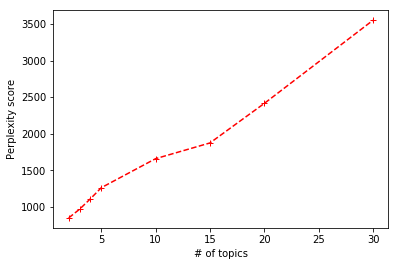

In [44]:
## plot the perplexity score with n_topics
import matplotlib.pylab as plt
plt.plot([2, 3, 4, 5, 10, 15, 20, 30],pscores,'r+--')
plt.xlabel('# of topics')
plt.ylabel('Perplexity score')
plt.show()

**Intepretation: up to 20 topics are reasonable, but no more. We use 5 topics as a heuristic and try to determine the topic names.**

In [45]:
# perform LDA
lda_final = LatentDirichletAllocation(n_components=5, max_iter=5, 
                                learning_method='online', # 
                                learning_offset=50., 
                                random_state=0) # set seed

lda_final.fit(tfidf)

lda_final.components_

array([[ 0.20953894,  0.25993255,  0.21301933, ...,  0.21360798,
         0.20832188,  0.20979744],
       [ 2.8832384 , 11.15258568,  5.47968136, ...,  2.68523663,
         6.59476924,  1.42003603],
       [ 1.64374439,  9.72133416,  3.85257908, ...,  0.79005145,
         3.82913295,  1.54643319],
       [ 0.22360444,  0.23354518,  0.2160373 , ...,  0.21621455,
         0.21490925,  0.21733231],
       [ 0.20773778,  0.21411897,  0.20938714, ...,  0.20733972,
         0.20994389,  0.20804147]])

In [47]:
# show some feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[:200])

['00', '000', '01', '10', '100', '1000', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '200', '2000', '2005', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '21', '22', '23', '24', '25', '26', '28', '30', '31', '40', '50', '500', '60', 'abl', 'abov', 'access', 'accid', 'accord', 'account', 'accur', 'accuraci', 'achiev', 'acknowledg', 'acquir', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'adjust', 'administr', 'adult', 'affect', 'age', 'agenc', 'aggreg', 'agre', 'agricultur', 'aim', 'air', 'airport', 'al', 'algorithm', 'allow', 'alreadi', 'alway', 'american', 'analys', 'analysi', 'analyz', 'ani', 'anim', 'annot', 'annual', 'anoth', 'answer', 'api', 'app', 'appear', 'appli', 'applic', 'approach', 'approxim', 'april', 'architectur', 'archiv', 'archive', 'area', 'art', 'articl', 'artist', 'arxiv', 'ask', 'assess', 'assign', 'assist', 'associ', 'attack', 'attempt', 'attribut', 'audio', 'august', 'author', 'automa

## Print out top 20 words
One chooses 20 instead of 10 words for better topic name finding.

In [49]:
for topic_idx, topic in enumerate(lda_final.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-20-1:-1]] 
    print('Topic:',topic_idx,'--',top_words) 

Topic: 0 -- ['movi', 'imdb', 'hotel', 'review', 'custom', 'revenu', 'genr', 'chicago', 'given', 'rate', 'content', 'releas', 'dataset', 'vote', 'offic', 'star', 'product', 'shoot', 'year', 'data']
Topic: 1 -- ['doe', 'descript', 'dataset', 'thi', 'data', 'use', 'http', 'context', 'content', 'imag', 'ani', 'contain', 'file', 'acknowledg', 'inspir', 'wa', 'column', 'com', 'time', 'word']
Topic: 2 -- ['data', 'thi', 'state', 'dataset', 'citi', 'year', 'wa', 'inform', 'countri', 'includ', 'use', 'acknowledg', 'content', 'number', 'report', 'context', 'contain', 'time', 'unit', 'file']
Topic: 3 -- ['bike', 'da', 'el', 'que', 'en', 'la', 'station', 'trip', 'com', 'site', 'data', 'csv', 'ca', 'softwar', 'kaggle', 'bea', 'download', 'dataset', 'http', 'base']
Topic: 4 -- ['dri', 'mxbean', 'bea', 'i0_lphost06', 'serverruntime', 'jdbcdatasourceruntim', 'type', 'jdbcconnectionpoolruntim', 'com', 'protein', 'source09', 'wine', '12', 'string', 'default', 'data', 'numer', 'star', 'elect', 'anim']


#### Interpretation of results

Results could show be the following topics:
- Topic 1 (index 0): IMDB Movie Reviews, e. g. article [IMDB Movie Reviews Dataset](https://www.kaggle.com/iarunava/imdb-movie-reviews-dataset)
- Topic 2 (index 1): HttpContext, e. g. article [Difference Between HttpContext.Current.Items and HttpContext.Current.Session in ASP.Net](https://www.c-sharpcorner.com/UploadFile/dacca2/difference-between-httpcontext-current-items-and-httpcontext/)
- Topic 3 (index 2): Open Data & Metadata, e. g. article [What is Metadata and Why is it as Important as Data Itself?](https://www.opendatasoft.com/blog/2016/08/25/what-is-metadata-and-why-is-it-important-data)
- Topic 4 (index 3): Download Datasets , e. g. article [Dataset Download | Kaggle](https://www.kaggle.com/surajdidwania/dataset-download)
- Topic 5 (index 4): Java MBeans, e. g. article [Navigating MBeans](https://docs.oracle.com/cd/E25054_01/web.1111/e13715/nav_edit.htm)

# Outlook / Next possible tasks

One could perform additional or alternative text preprocessing transformations regarding the variable 'Description' such as
    
- lemmatization (as alternative to stemming)
- remove URLs
- remove punctuation
- remove pattern '\r\n', e. g. using regex

to check improvement on LDA outcome.